In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option("display.max_columns", None)

In [132]:
bank = pd.read_csv("../data/bank.csv")

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37444 non-null  float64
 1   job             38923 non-null  float64
 2   marital         41108 non-null  object 
 3   education       39457 non-null  float64
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        5625 non-null   float64
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  36040 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [133]:
num_var = bank.columns[bank.dtypes != "object"].to_list()
num_var.pop(num_var.index("y"))
cate_var = bank.columns[bank.dtypes == "object"].to_list()
print(f'{len(num_var)}, {len(cate_var)}')

15, 4


### Analysis of numeric features

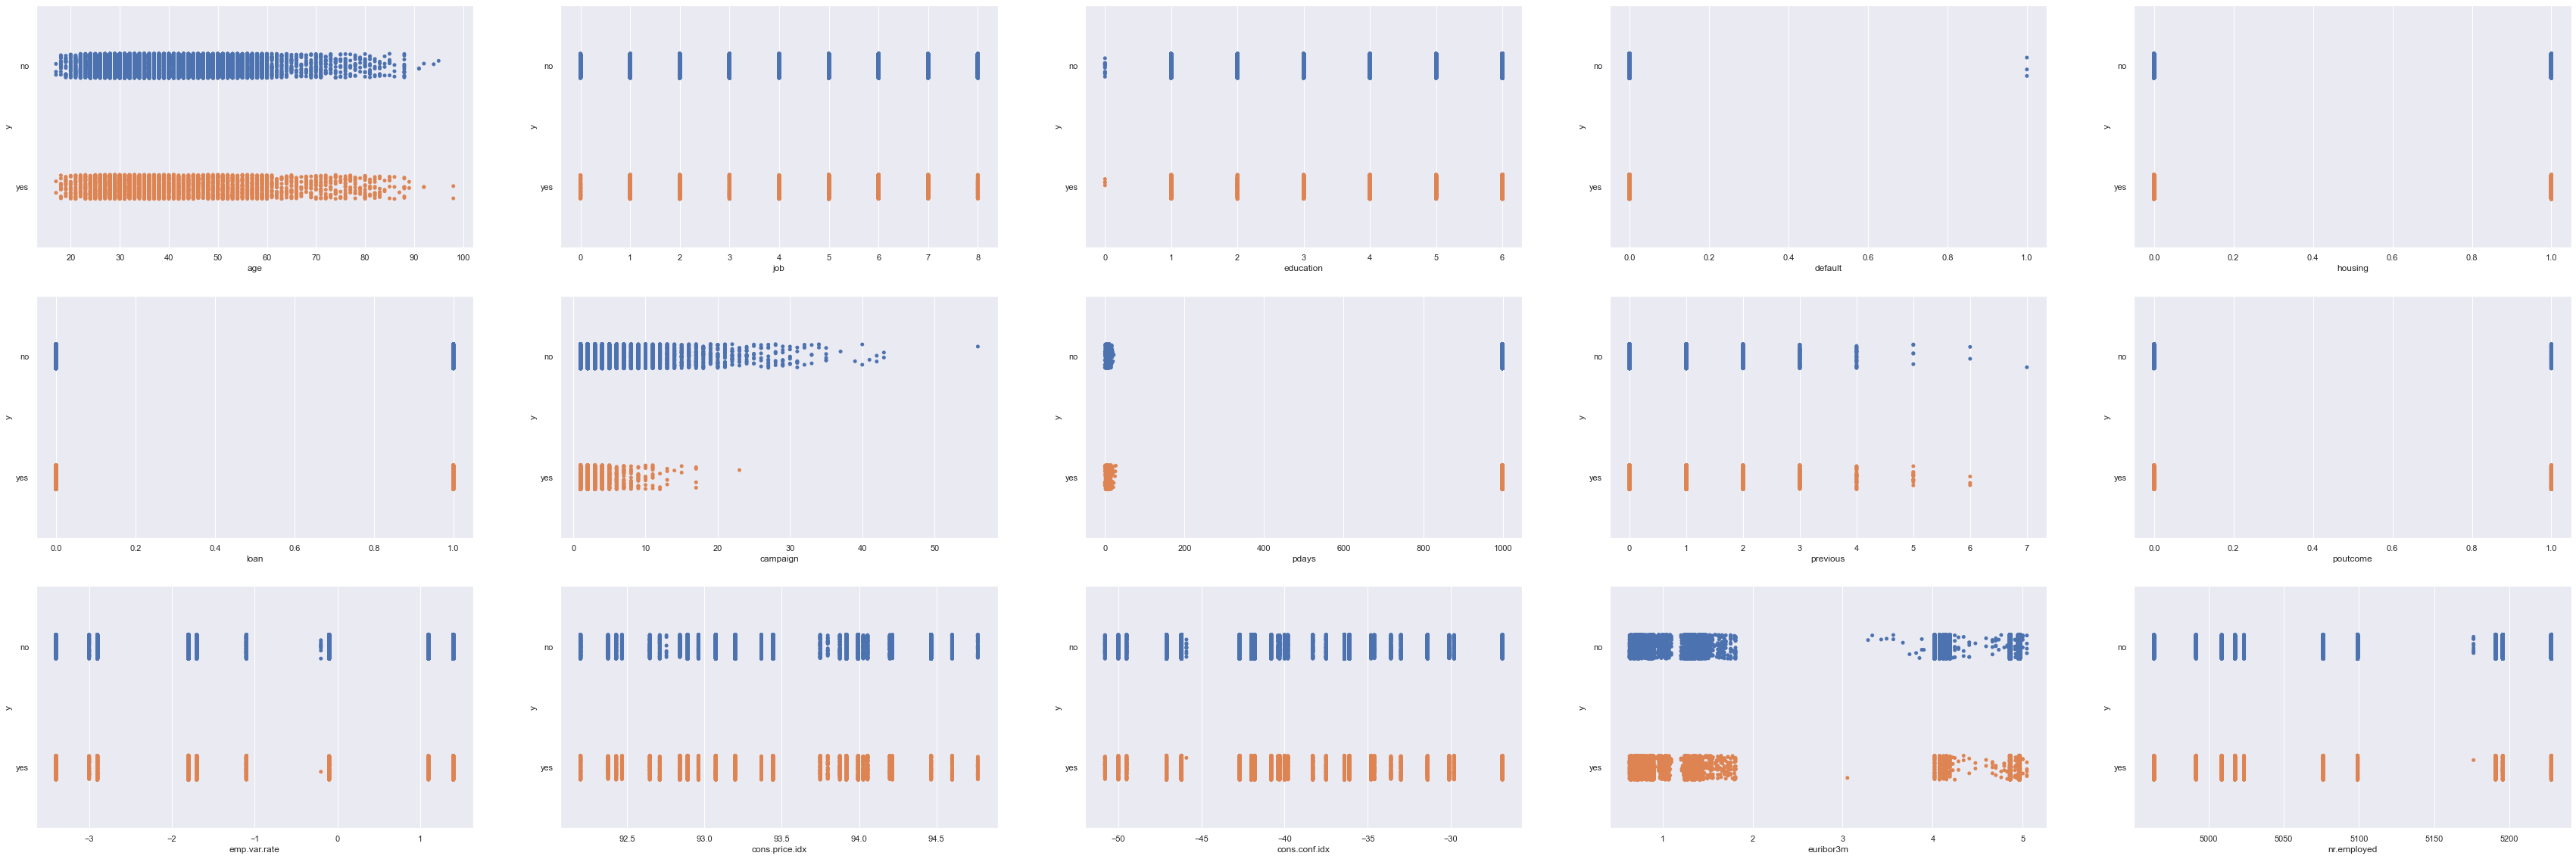

In [134]:
bank["y"] = bank["y"].map({1: "yes", 0: "no"})
fig, ax = plt.subplots(3, 5, figsize = (60, 20))
sns.set_theme(style = "white")
for i in range(len(num_var)):
    if i < 5:
        sns.stripplot(x = num_var[i], y = "y", data = bank, jitter = True,
                      ax = ax[0, i], s = 5)
    elif i < 10:
        sns.stripplot(x = num_var[i], y = "y", data = bank, jitter = True,
                      ax = ax[1, i - 5], s = 5)
    else:
        sns.stripplot(x = num_var[i], y = "y", data = bank, jitter = True,
                      ax = ax[2, i - 10], s = 5)

plt.show()

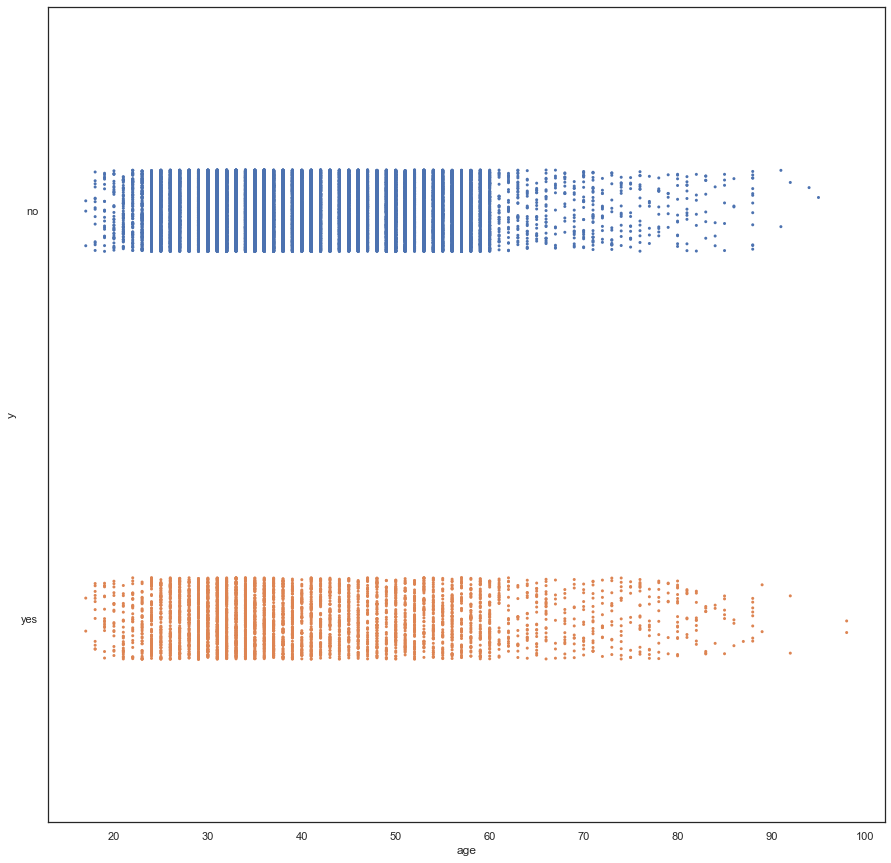

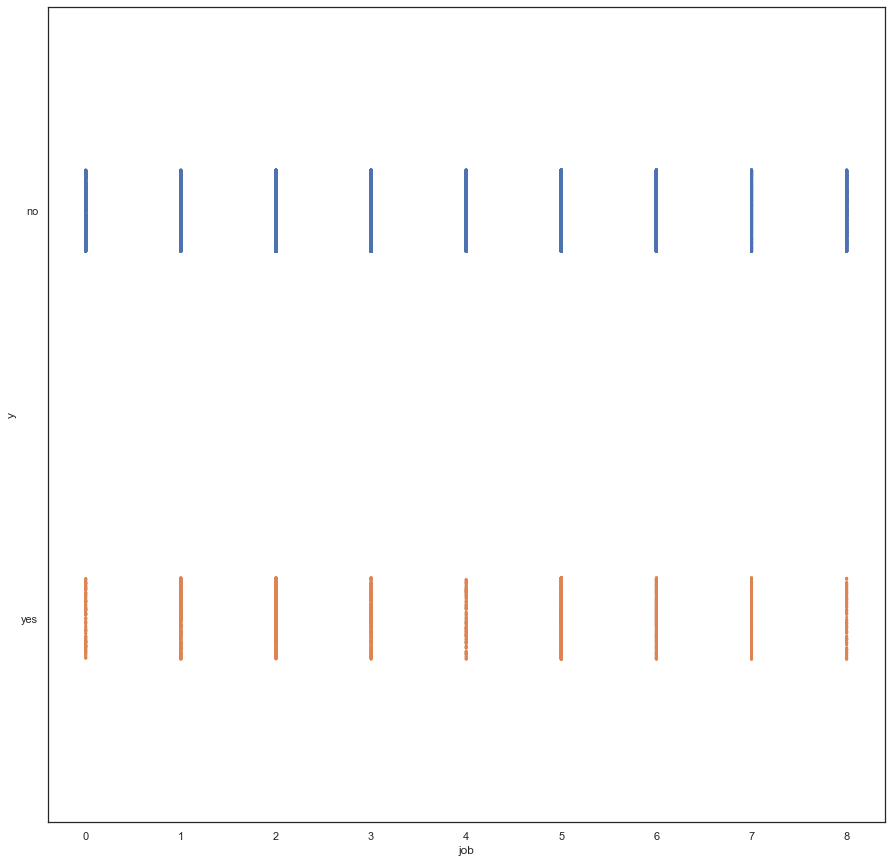

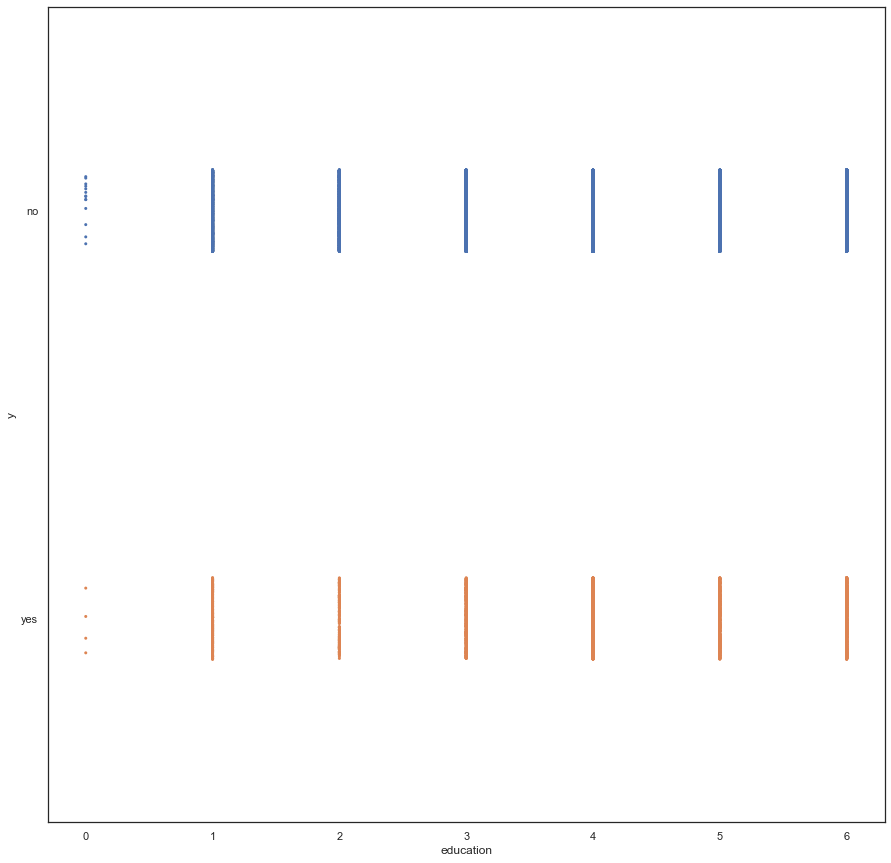

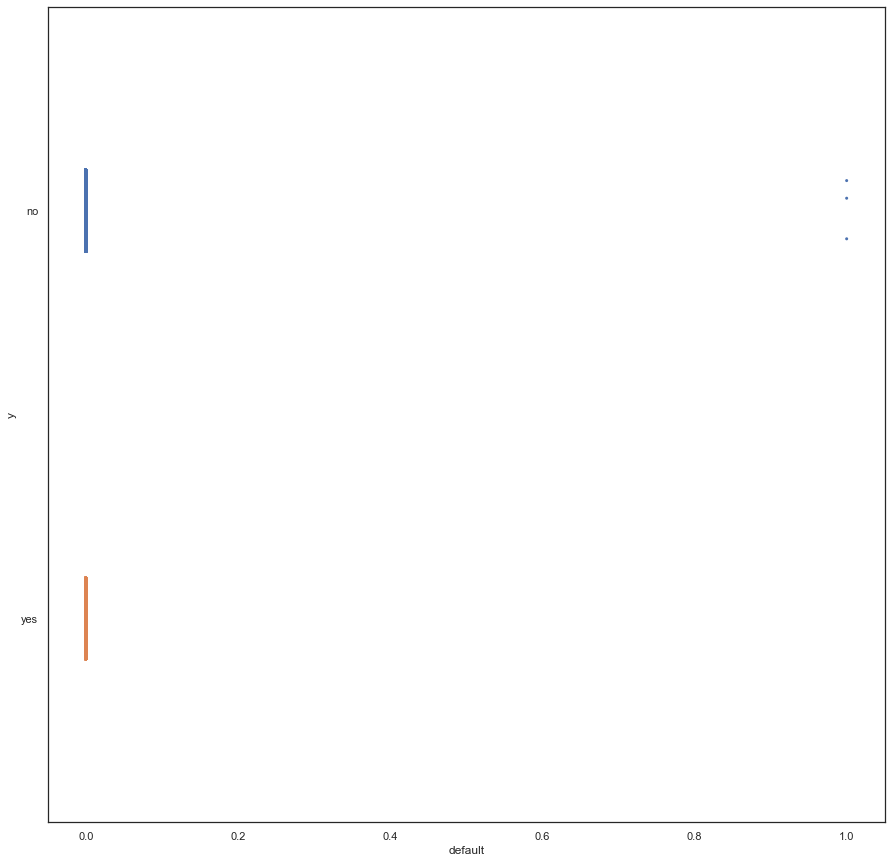

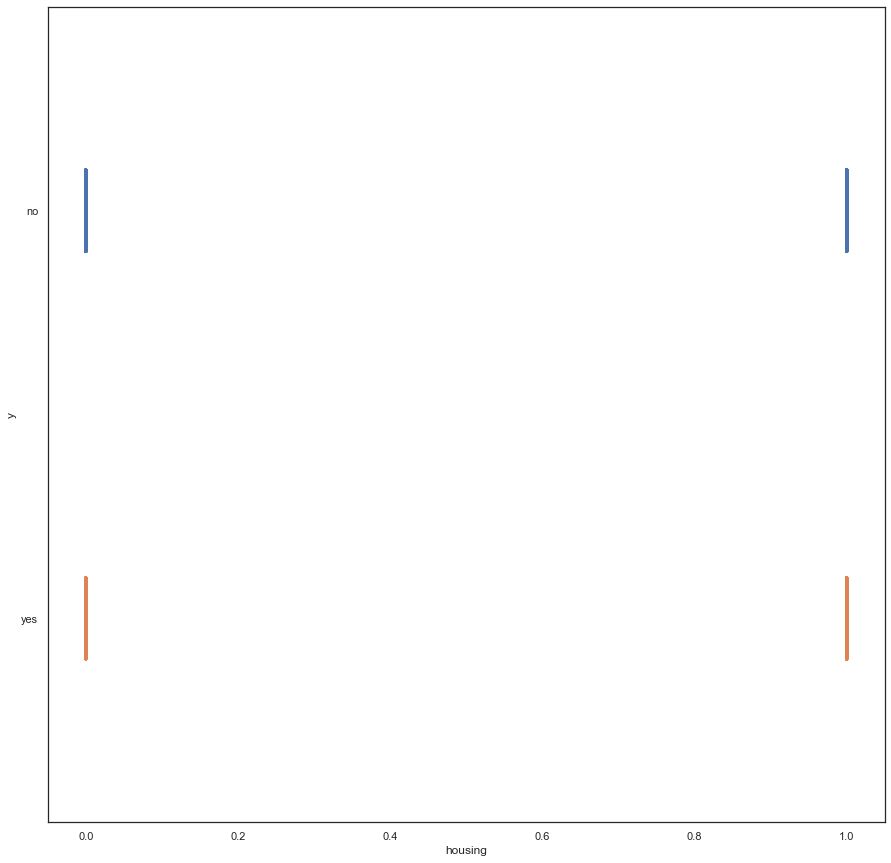

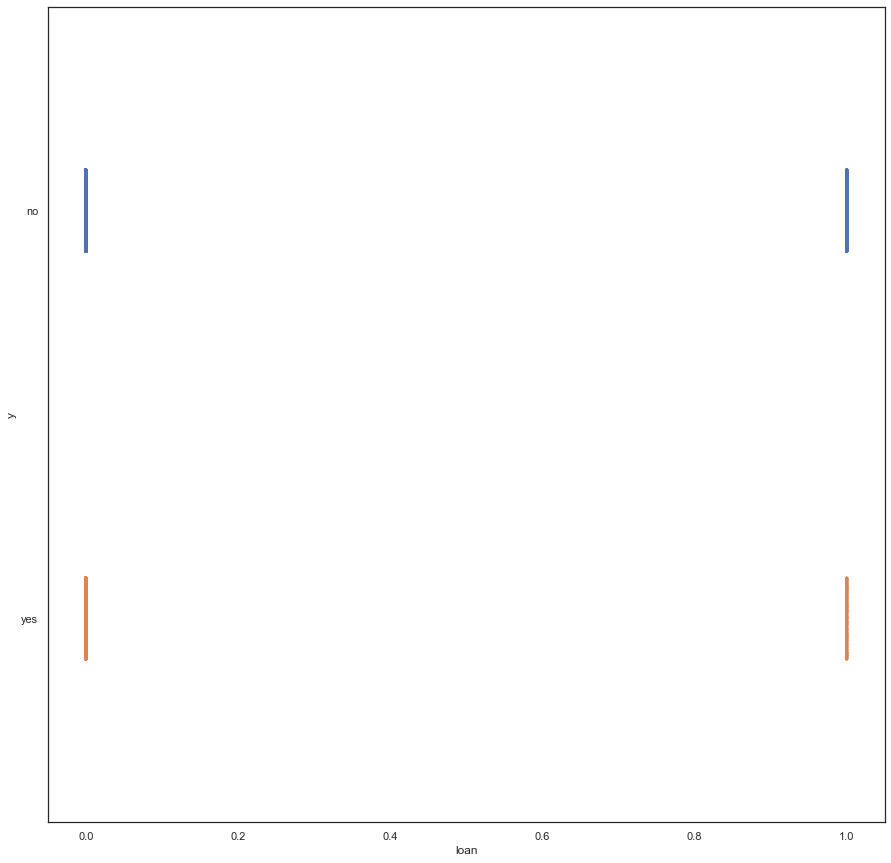

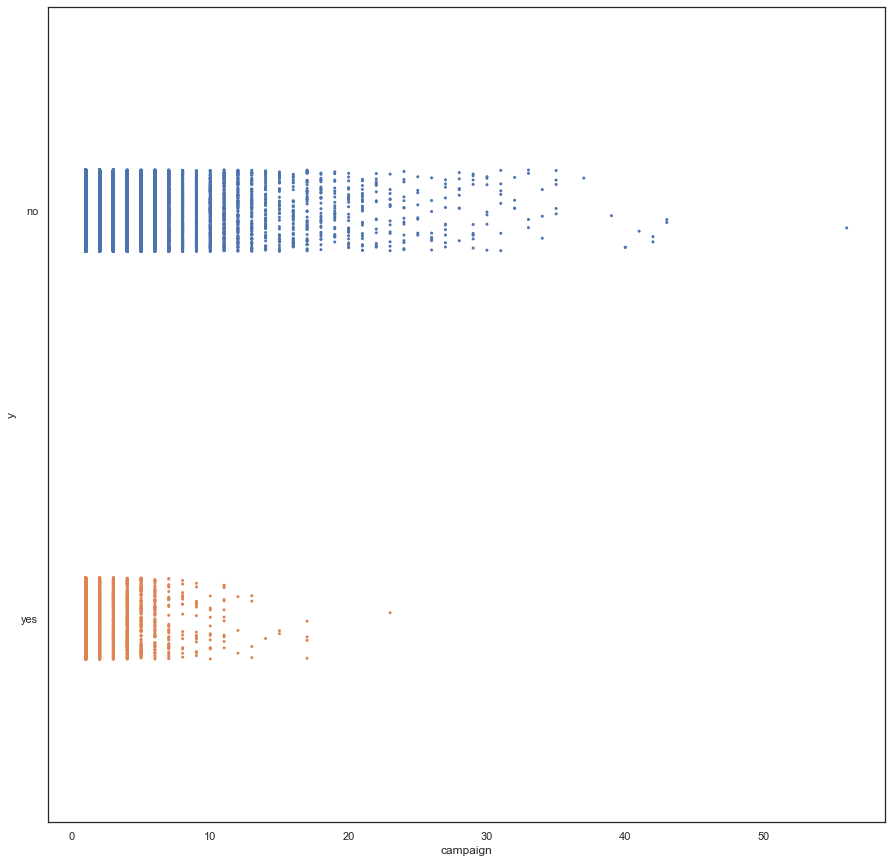

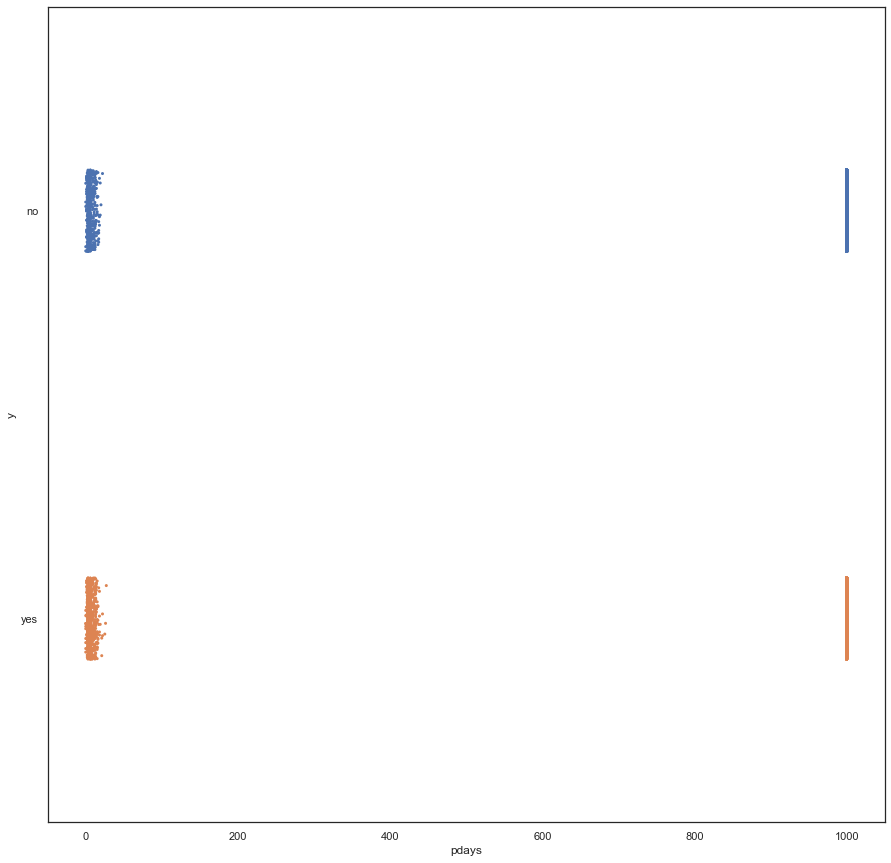

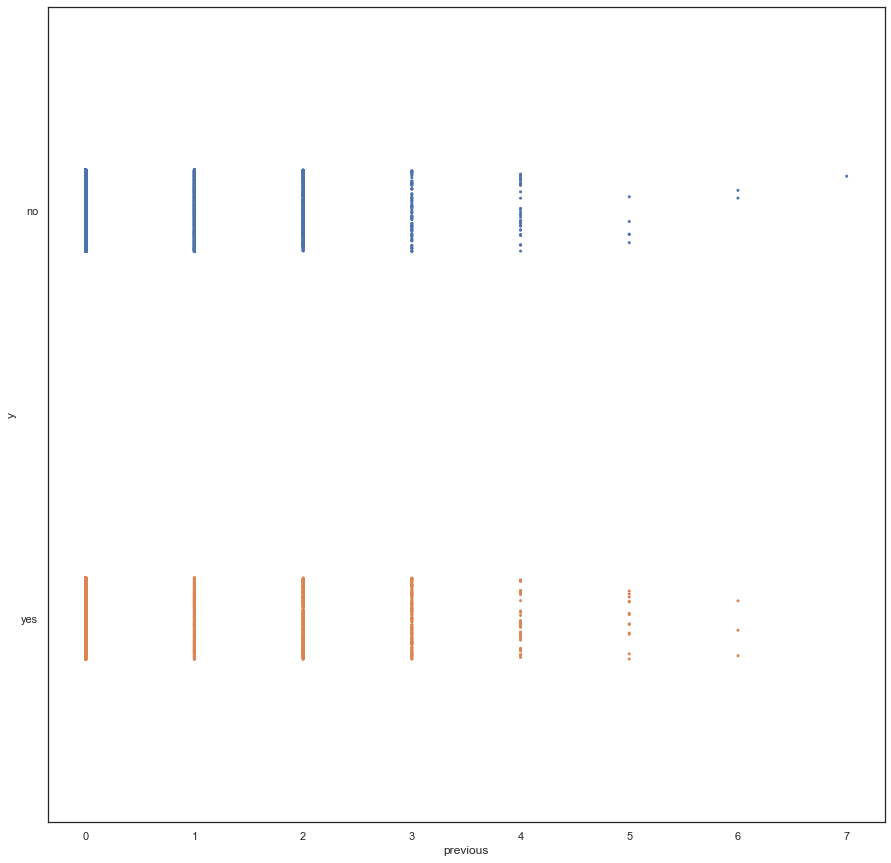

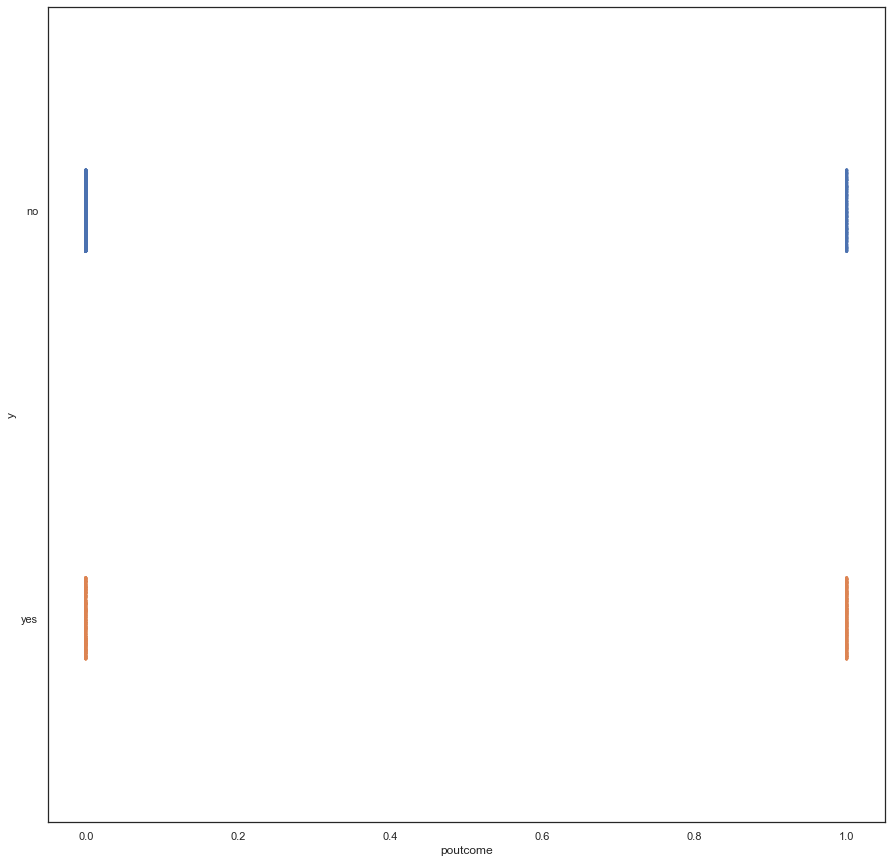

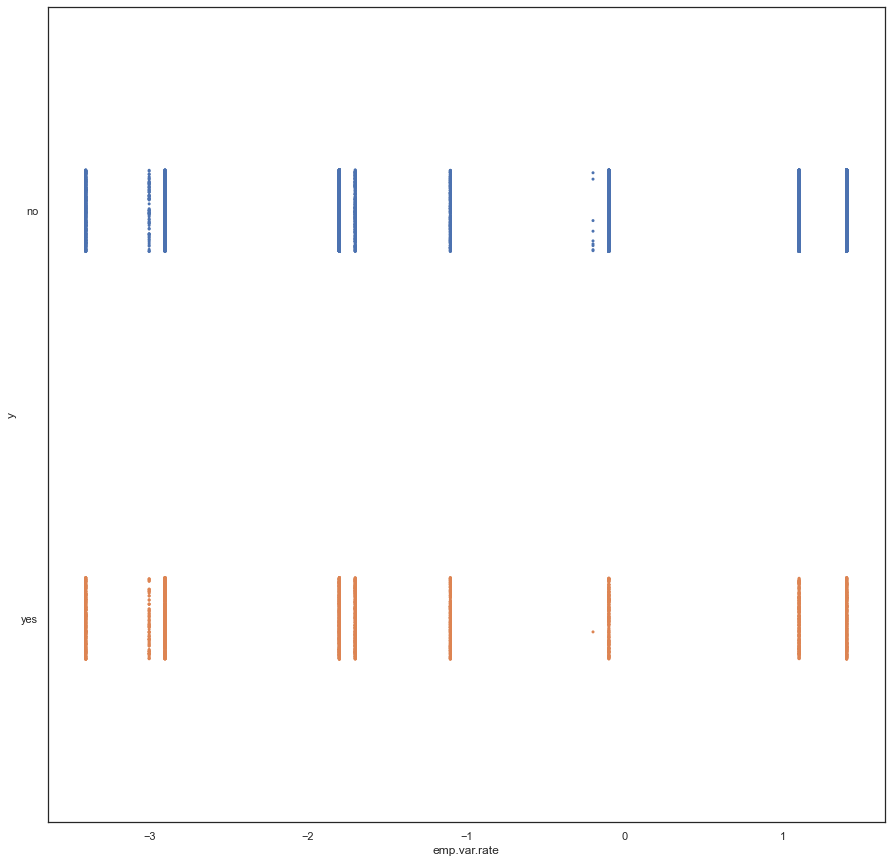

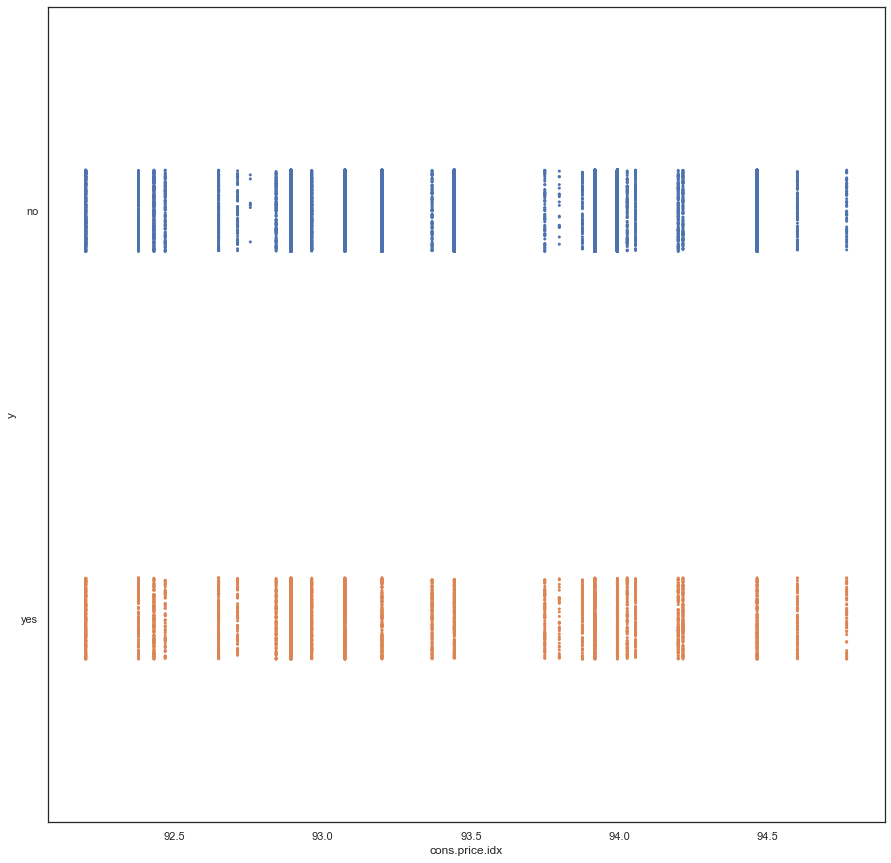

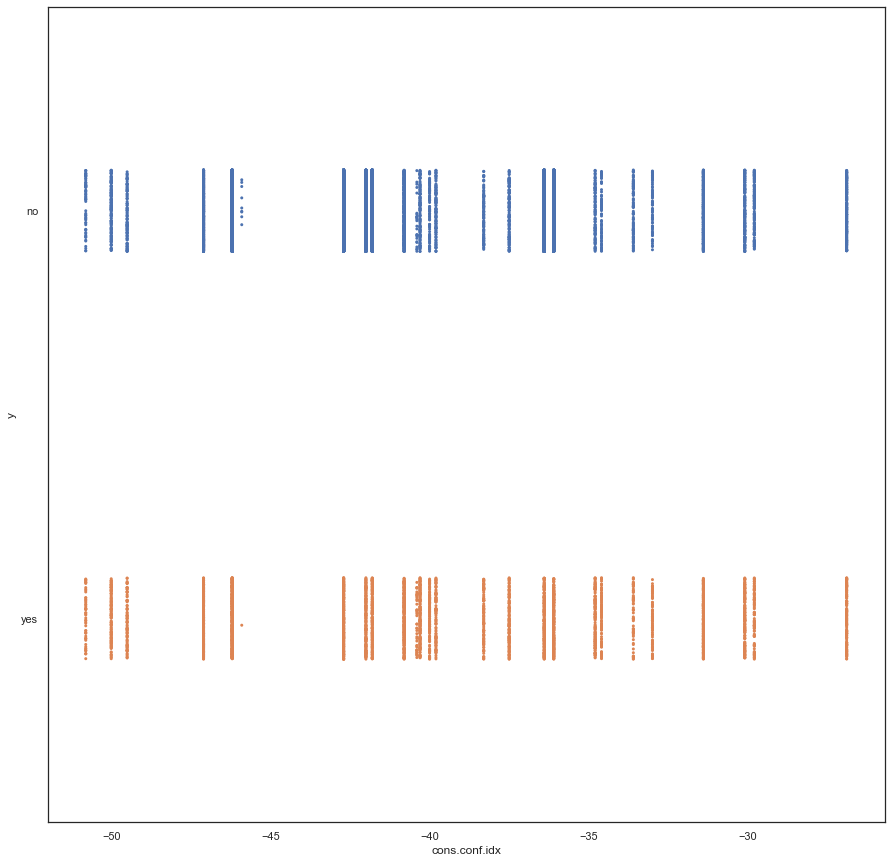

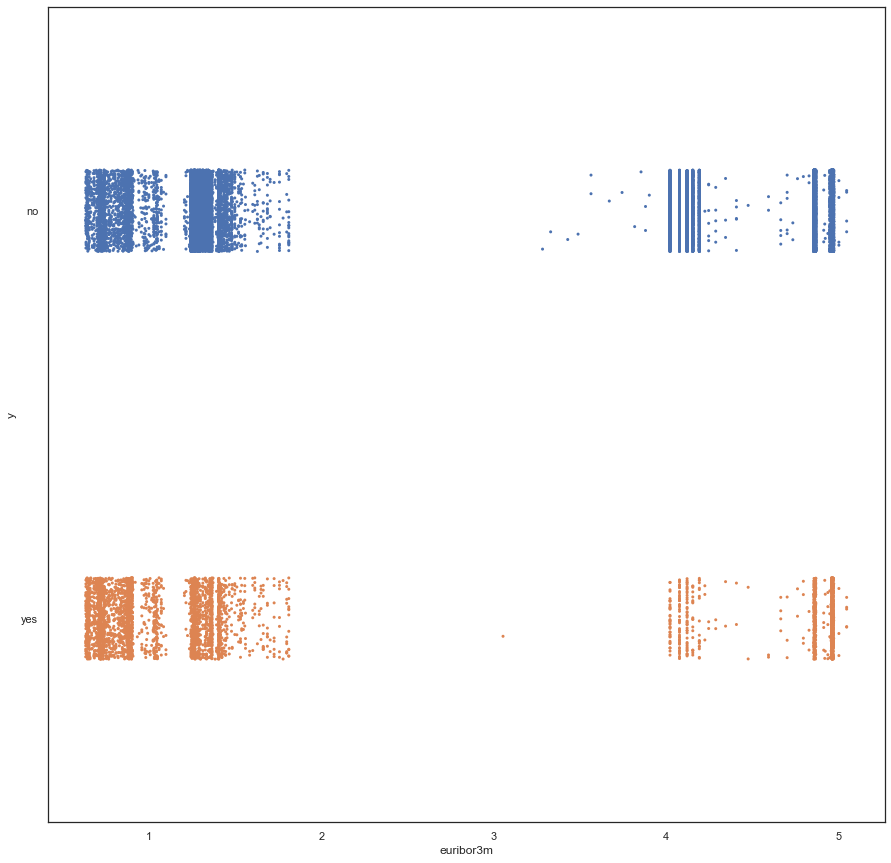

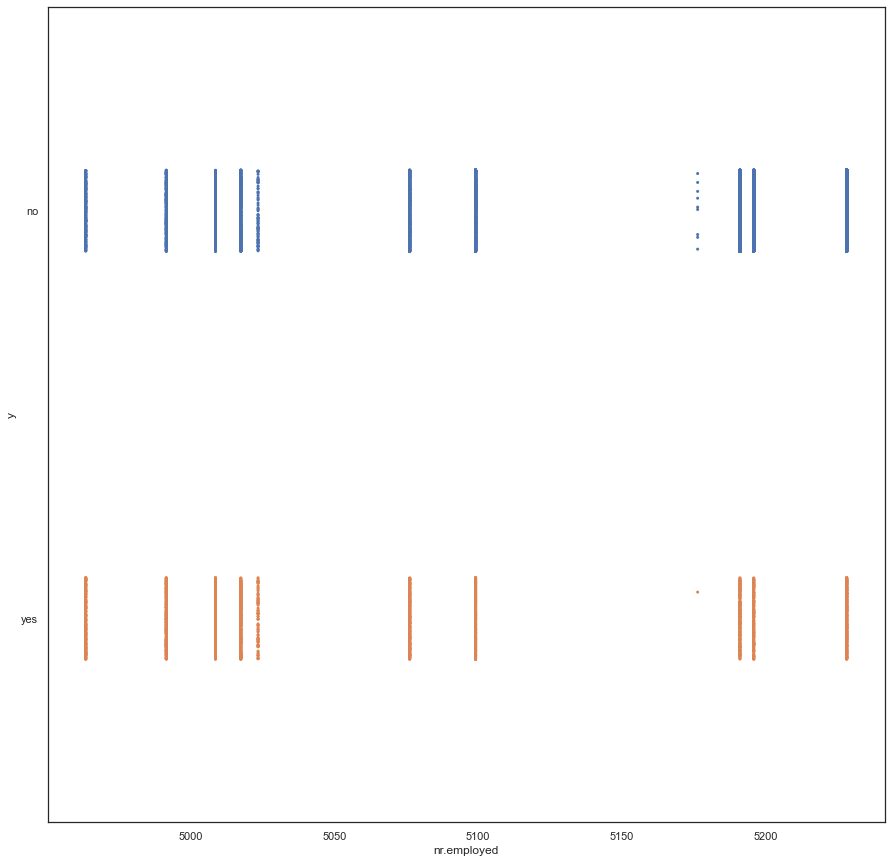

<Figure size 432x288 with 0 Axes>

In [135]:

for i in range(len(num_var)):
    plt.figure(figsize = (15, 15))
    sns.stripplot(x = num_var[i], y = "y", data = bank, jitter = True, s = 3)
    plt.show()
plt.tight_layout()


Only "Campaign" looks significant. -> People are less likely to subscribe as phone calls get more frequent.
### Analysis on categorical features

### Correlation heatmap

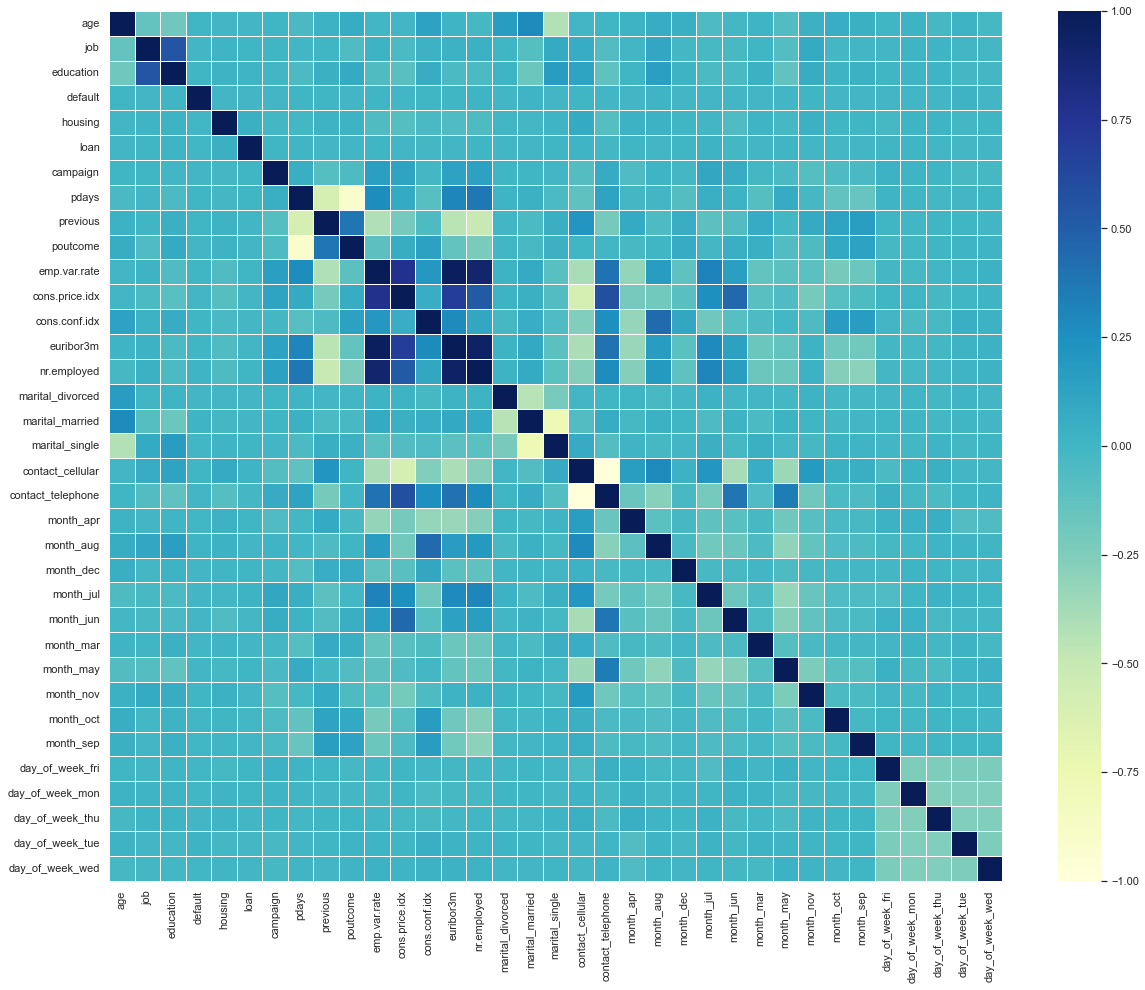

In [136]:
bank_flattened = pd.read_csv("../data/bank_imputed_imp.csv").drop(columns = ["y"])

plt.figure(figsize = (20, 16))
sns.set(font_scale = 1)
sns.heatmap(bank_flattened.corr(), cmap = "YlGnBu", linewidth = 1)
plt.show()

Focus on the highly correlated region

In [137]:
bank_flattened.iloc[:, 7:14].corr()

,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
pdays,1.000000,-0.587514,-0.914448,0.271004,0.079238,-0.091342,0.296899
previous,-0.587514,1.000000,0.384552,-0.420489,-0.203549,-0.050936,-0.454494
poutcome,-0.914448,0.384552,1.000000,-0.111366,0.062860,0.142732,-0.139568
emp.var.rate,0.271004,-0.420489,-0.111366,1.000000,0.776246,0.196041,0.972245
cons.price.idx,0.079238,-0.203549,0.062860,0.776246,1.000000,0.058949,0.689170
cons.conf.idx,-0.091342,-0.050936,0.142732,0.196041,0.058949,1.000000,0.277686
euribor3m,0.296899,-0.454494,-0.139568,0.972245,0.689170,0.277686,1.000000


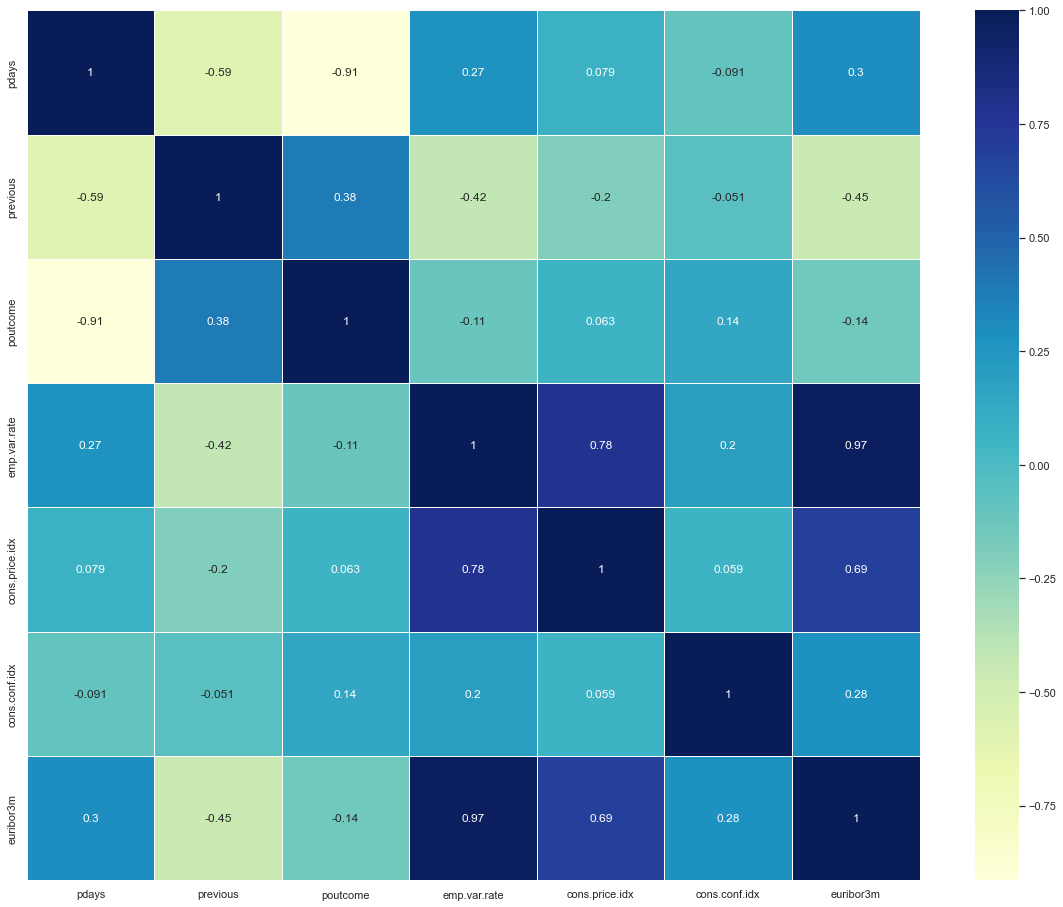

In [138]:
plt.figure(figsize = (20, 16))
sns.set(font_scale = 1)
sns.heatmap(bank_flattened.iloc[:, 7:14].corr(), cmap = "YlGnBu", linewidth = 1,
            annot = True)
plt.show()

### Observations and conclusions

- More frequent phone calls, less likely to get subscription.
- Social and economic context attributes are highly correlated, which makes sense.
-


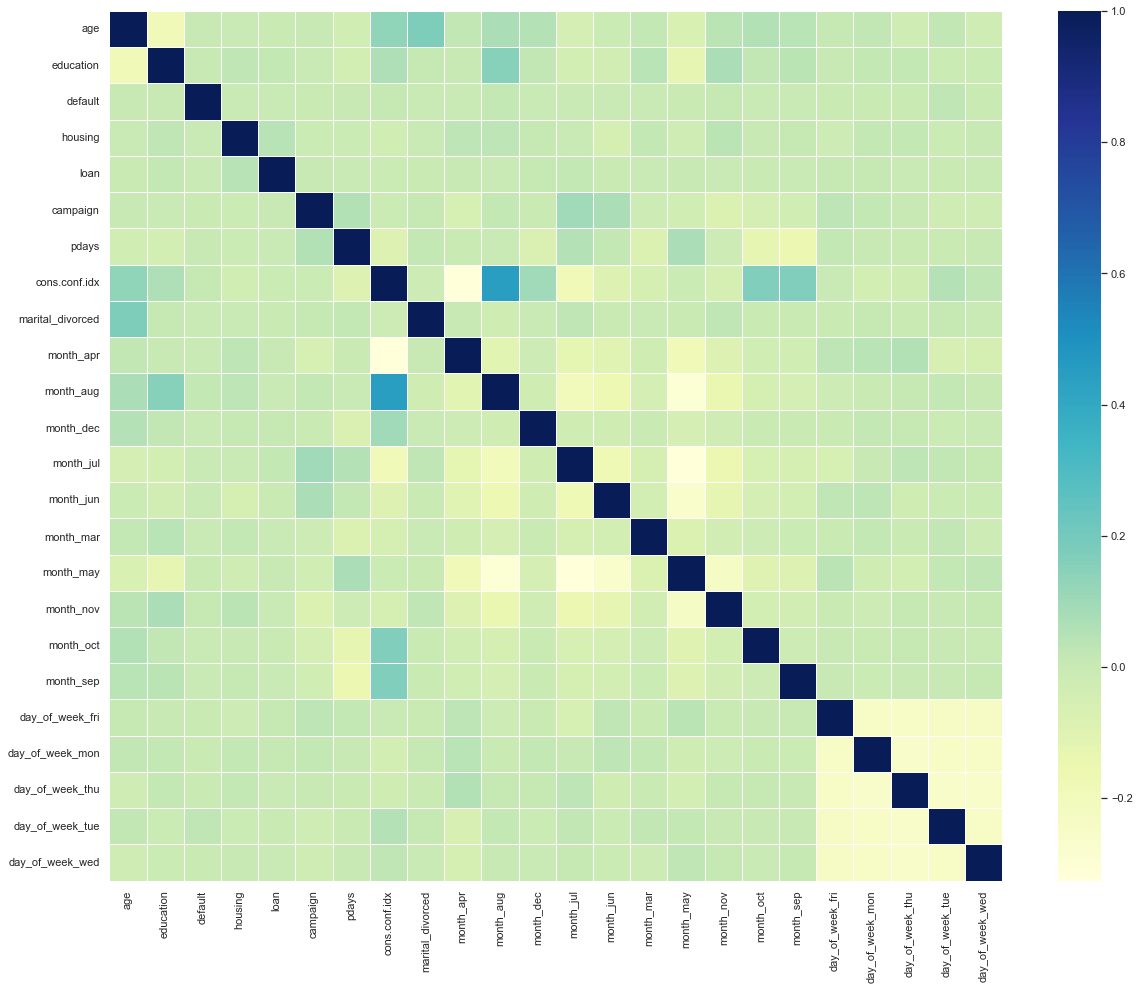

In [139]:
# feature selection for logistic regression
bank_flattened = bank_flattened.drop(columns = ["emp.var.rate", "previous" , "contact_telephone", "marital_single", "euribor3m", "cons.price.idx", "poutcome", "job", "nr.employed", "contact_cellular", "marital_married"])
bank_flattened.to_csv("../data/bank_selected.csv")
plt.figure(figsize = (20, 16))
sns.set(font_scale = 1)
sns.heatmap(bank_flattened.corr(), cmap = "YlGnBu", linewidth = 1)
plt.show()
